**CHURN PREDICTION. **

This dataset is for ABC Multistate bank with following columns:

* customer_id
* credit_score, used as input.
* country, used as input.
* gender, used as input.
* age, used as input.
* tenure, used as input. From how many years he/she is having bank acc in ABC Bank
* balance, used as input.
* products_number, used as input.
* credit_card, used as input.
* active_member, used as input.
* estimated_salary, used as input.
* churn, used as the target. 1 if the client has left the bank during some period or 0 if he/she has not.


For this classification problem we are going to use logistic regression.


In [ ]:
## Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import svm
import sklearn
import matplotlib
import warnings 

warnings.filterwarnings('ignore')

In [ ]:
## Loading dataset

df = pd.read_csv('/content/Bank Customer Churn Prediction.csv',sep = ',')
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Exploratory analysis


In [ ]:
## Vefifying Nans
print(df.isna().sum())

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64


In [ ]:
df.dtypes

customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [ ]:
df.count()

customer_id         10000
credit_score        10000
country             10000
gender              10000
age                 10000
tenure              10000
balance             10000
products_number     10000
credit_card         10000
active_member       10000
estimated_salary    10000
churn               10000
dtype: int64

In [ ]:
## Valores Unicos
df.nunique()

customer_id         10000
credit_score          460
country                 3
gender                  2
age                    70
tenure                 11
balance              6382
products_number         4
credit_card             2
active_member           2
estimated_salary     9999
churn                   2
dtype: int64

In [ ]:
### Checking duplicates
df.duplicated().value_counts()

False    10000
dtype: int64

In [ ]:
#### In this case, there are no Nans, duplicates and all features has 10000 observations.

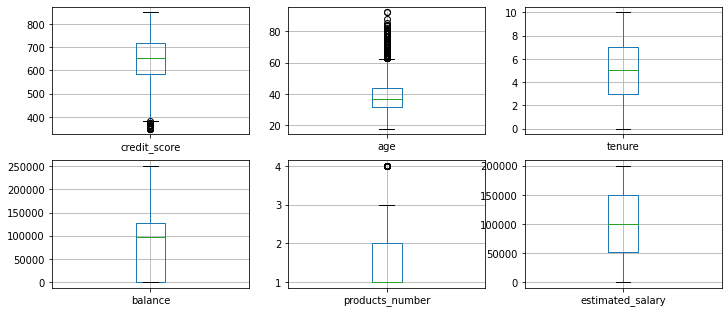

In [ ]:
## Ploting outliers for continuous_variables

df_outliers = df
categorical_variables = ['customer_id','country','gender','credit_card','active_member','churn']
df_outliers = df.drop(categorical_variables,axis = 1) 
continuous_variables = df_outliers.columns

fig = plt.figure(figsize = (12,8))

for i, col in enumerate(continuous_variables):
    plt.subplot(3,3,i+1);
    df.boxplot(col)

## In this case, we are not going to deal with the outliers.

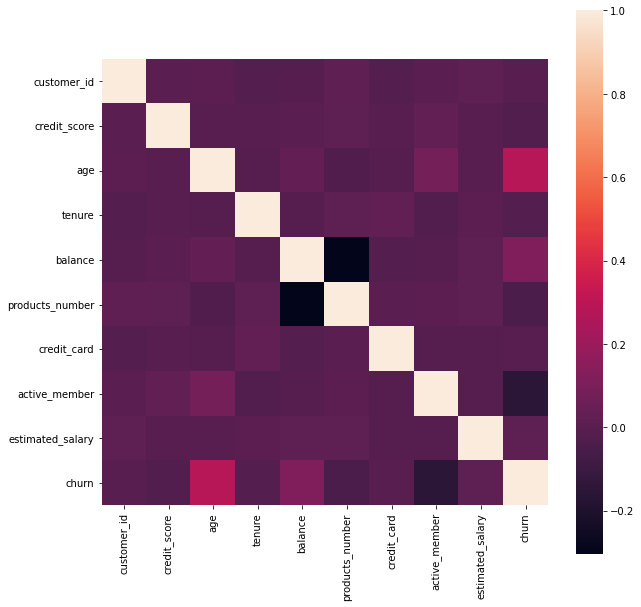

In [ ]:
## Checking correlation matrix 

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), vmax=1., square=True)

## There are no strong correlation between features, 
## but we can observe a reasonable correlation between age and the target value churn.

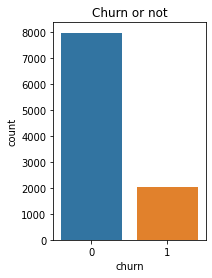

In [ ]:
## Checking if there is a big difference between the count of the distinct churn values ( Skewd data)

plt.subplot(1,2,2)
plt.title('Churn or not')
sns.countplot(df['churn'])

In this case, 80% of the observations are 0 and 20% are 1. This is a big difference and may skew the model.

**We have two options:**

* Drop data.
* Create artificial observations using imblearn. 

In this case, since there is not a lot of data, we'll try to create artificial registers.
 

In [ ]:
### Transforming categorical text variables in numbers using onehotencoding ####
df_OneHotEncoded = pd.get_dummies(df)

## Removing Customerid
del df_OneHotEncoded['customer_id']

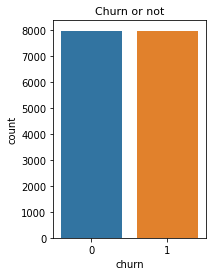

In [ ]:
## Creating the artificial observations for the less frequent value of the target variable

import imblearn
from imblearn.over_sampling import SMOTE

seed = 10

features = df_OneHotEncoded.drop('churn',axis = 1)
target = df_OneHotEncoded['churn']

smote_bal = SMOTE(random_state = seed)

features_res,target_res = smote_bal.fit_resample(features,target)

features = features_res
target = target_res

plt.subplot(1,2,2)
plt.title('Churn or not',fontsize = 11)
sns.countplot(target_res)
plt.show()

In [ ]:
## Separating train and test datasets 
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size= 0.3)

## Transforming to the same scale.
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [ ]:
## Creating the first model 
from sklearn.linear_model import LogisticRegression

model_logistic_regression = LogisticRegression()

## Training model
model_logistic_regression.fit(x_train,y_train)

## Predicting for train data
train_prevision = model_logistic_regression.predict(x_train)

In [ ]:
## Analyzing Metrics

from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

METRICS = {'accuracy_score': accuracy_score(y_train,train_prevision),
           'Confusion_matrix': confusion_matrix(y_train,train_prevision),
           'F1-Score': f1_score(y_train,train_prevision),
           'Precision': precision_score(y_train,train_prevision),
           'Recall':recall_score(y_train,train_prevision) 
          }



* 'accuracy_score': 83,7%
*   'Confusion_matrix': 
            * [5022,  552]
            * [1262, 4312]
* 'F1-Score': 82,6%
* 'Precision': 88,6%
* 'Recall': 77,3%

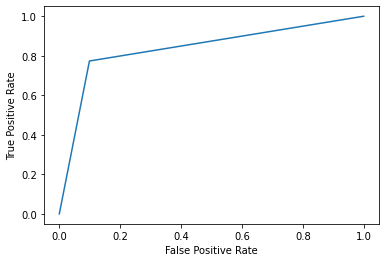

In [ ]:
# Creating ROC curve
fpr, tpr, _ = metrics.roc_curve(y_train,  train_prevision)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()